# Implementation of MDP value iteration
see: http://www.cs.cmu.edu/afs/cs/academic/class/15780-s16/www/slides/mdps.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
movable = np.array(
        [[1, 1, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 1, 1]]
    ).astype(np.bool)

rewards = np.array(
        [[   0,    0,    0,    1],
         [   0,    0,    0, -100],
         [   0,    0,    0,    0]]
    ).astype(np.float)

# probability distribution for each action, mapping move to probability
# move is a tuple of position offsets for y, x
actions = [
    {(0, -1): 0.8, (-1, 0): 0.1, (1, 0): 0.1},
    {(0, 1): 0.8, (-1, 0): 0.1, (1, 0): 0.1},
    {(-1, 0): 0.8, (0, -1): 0.1, (0, 1): 0.1}, 
    {(1, 0): 0.8, (0, -1): 0.1, (0, 1): 0.1}
]

discount_factor = 0.9

action_label = ['<', '>', '^', 'v', ' ']
plot_normalization = Normalize(0, 8)

In [3]:
def pos_after_move(pos, move):
    return tuple(np.array(pos) + np.array(move))

def valid_move(pos, move, movable):
    return pos_after_move(pos, move) in np.ndindex(value.shape) and valid_pos(pos_after_move(pos, move), movable)

def valid_pos(pos, movable):
    return movable[pos]

def pos_value(pos, value):
    return value[pos]

def move_value(pos, move, value):
    return pos_value(pos_after_move(pos, move), value)

def action_value(pos, action, value, movable):
    return np.sum([
        (move_value(pos, move, value) if valid_move(pos, move, movable) else pos_value(pos, value)) * probability
        for move, probability in action.items()
    ])

def calc_new_value(pos, value, movable):
    return rewards[pos] + discount_factor * np.max([
        action_value(pos, action, value, movable)
        for action in actions
        if valid_pos(pos, movable)
    ], initial=np.NINF)

iteration 1


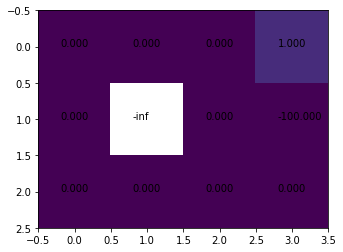

iteration 2


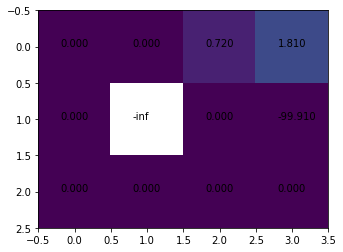

iteration 5


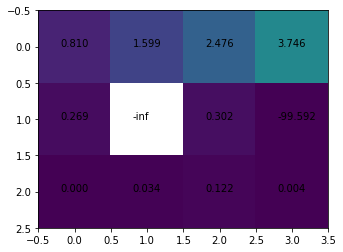

iteration 10


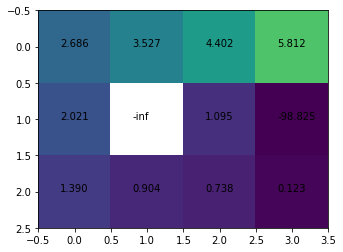

iteration 1000


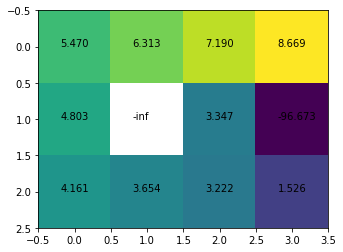

In [4]:
value = np.zeros_like(rewards)
for i in range(1000):
    new_value = np.zeros_like(value)
    for pos in np.ndindex(value.shape):
        new_value[pos] = calc_new_value(pos, value, movable)
    value = new_value
    if i + 1 in [0, 1, 2, 5, 10, 1000]:
        print('iteration', i + 1)
        plt.imshow(value, norm=plot_normalization)
        for pos in np.ndindex(value.shape):
            plt.text(pos[1] - 0.2, pos[0], '%.3f' % value[pos])
        plt.show()

In [5]:
def calc_best_action(pos, value, movable):
    return np.argmax([
        action_value(pos, action, value, movable)
        for action in actions
    ]) if valid_pos(pos, movable) else -1

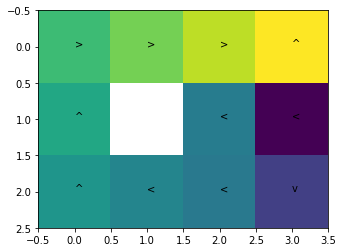

In [6]:
plt.imshow(value, norm=plot_normalization)
for pos in np.ndindex(value.shape):
    best_action = calc_best_action(pos, value, movable)
    plt.text(pos[1], pos[0], action_label[best_action])